1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [8]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
import pickle

In [19]:
avg = 6.3
init = 15
sigma_mu = np.sqrt(avg)
prob = 1 - scipy.stats.poisson.cdf(init, avg)
print("Probability of 15 or more hurricances in a year: ", prob )

z_score = (15 - 6.3) / math.sqrt(6.3) 
print("Z score: ", z_score)

if z_score >= 3:
    print("There is a significant difference between the number of hurricanes in 2005 and the historic average.")
else:
    print("There is no significant difference between the number of hurricanes in 2005 and the historic average.")

Probability of 15 or more hurricances in a year:  0.0008444930803583883
Z score:  3.4661629670697414
There is a significant difference between the number of hurricanes in 2005 and the historic average.


Z score:  3.4661629670697414


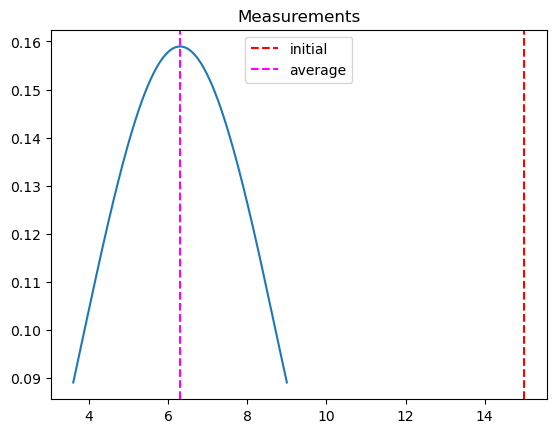

In [27]:
w = avg - init
x = np.linspace(avg - w - 6, w + avg + 6, 1000)
y = stats.norm.pdf(x, loc=avg, scale=sigma_mu)
plt.plot(x, y)
plt.axvline(init, linestyle='--', color='red', label='initial')
plt.axvline(avg, linestyle='--', color='magenta', label = 'average')
plt.title("Measurements")
plt.legend()
plt.show()

Z score:  3.4661629670697414


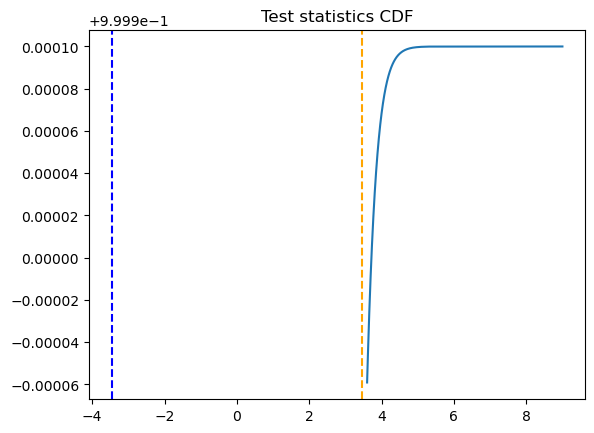

In [28]:
cs = stats.norm.cdf(x)
print("Z score: ", z_score)
plt.plot(x, cs)
plt.axvline(z_score, linestyle='--', color='orange')
plt.axvline(-z_score, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.show()

In [29]:
pvalue = 1. - stats.norm.cdf(z_score)

print("p-value =", pvalue)
print("The probability of observing 15 or more hurricances is low")

p-value = 0.00026397158691493505
The probability of observing 15 or more hurricances is low


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [62]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n=10

sigma_pre = np.var(pre, ddof=1)
sigma_post = np.var(post, ddof=1)
sigma = np.sqrt(((sigma_pre)+(sigma_post))/2)

mean_pre = abs(np.mean(pre))
mean_post = abs(np.mean(post))

T = (mean_pre - mean_post) / (sigma * np.sqrt(2/n))
print("T: "+str(T))
p = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("P-value: "+ str(p))

if p_value > 0.05:
    print("The change in blood pressures within our sample WAS NOT statistically significant.")
else:
    print("The change in blood pressures within our sample WAS statistically significant.")

T: -3.786997938137629
P-value: 0.004302464132864604
The change in blood pressures within our sample WAS NOT statistically significant.


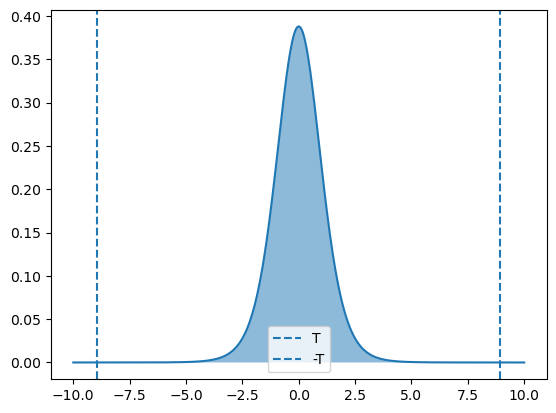

In [61]:
f = np.linspace(-10, 10, 500)
t_stats = stats.t.pdf(f, n - 1)

plt.plot(f, t)
plt.fill_between(f, t, where=(np.abs(f) > np.abs(0)), alpha=0.50, )
plt.axvline(T, linestyle='--', label = 'T')
plt.axvline(-T, linestyle='--', label = '-T')
plt.legend()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

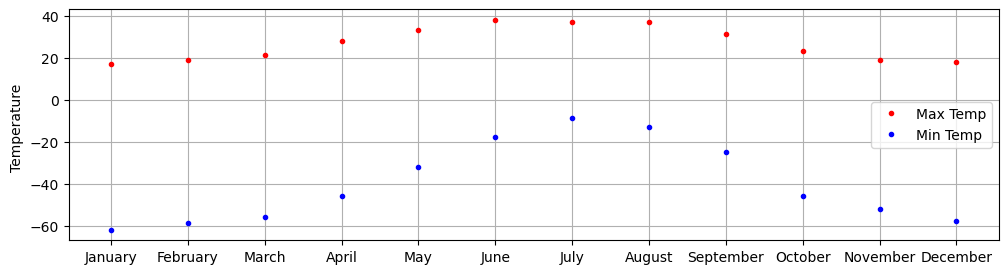

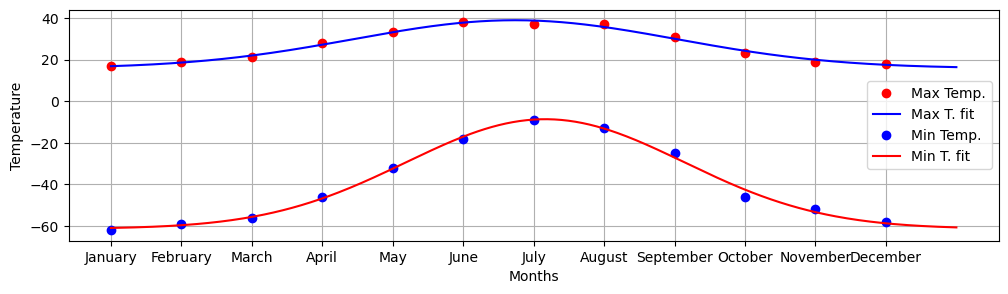

In [73]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
m2=np.arange(0,12,1)
days=np.linspace(0,12,365)

plt.figure(figsize=(12,3))
plt.plot(months, max_temp, 'r.', label="Max Temp")
plt.plot(months, min_temp, 'b.', label="Min Temp")
plt.ylabel('Temperature ')
plt.legend()
plt.grid()
plt.show()

#fit the data
def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o

res_max, cov_max = optimize.curve_fit(gauss, m2, max_temp)
res_min, cov_min = optimize.curve_fit(gauss, m2, min_temp,[50, 6, 1, -60])

plt.figure(figsize=(12,3))
plt.plot(months, max_temp, 'ro', label="Max Temp.")
plt.plot(days, gauss(days, *res_max), 'b-', label="Max T. fit")
plt.plot(months, min_temp, 'bo', label="Min Temp.")
plt.plot(days, gauss(days, *res_min), 'r-', label="Min T. fit")
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.grid()
plt.show()


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [75]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-01-20 19:03:20--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-20 19:03:21--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc594d59362ed4afb0feceb02006.dl.dropboxusercontent.com/cd/0/inline/B04XQu216DSSLtdQjQHdlvkcjv8oz1kG7Y10UvrtQTqO4O2inxFdt4CX_NNcW1HOVJRVGPgnXATk83Uf2DV7VQTJWqUMcZCEtUbMh0a4e2bs1ORyDtO41bT9sLdaixthb9tJz__xwWz_e93g35OI83Jq5Tve3awxpdJ4b8DuG7ET5A/file# [following]
--2023-01-20 19:03:21--  https://uc594d59362ed4afb0feceb02006.dl.dropboxusercontent.com/cd/0/inline/B04XQu216DSSLtdQjQHdlvkcjv8oz1kG7Y10UvrtQTqO4O2inxFdt4CX_NNcW1HOVJRVGPgnXATk83Uf2DV7VQTJWqU

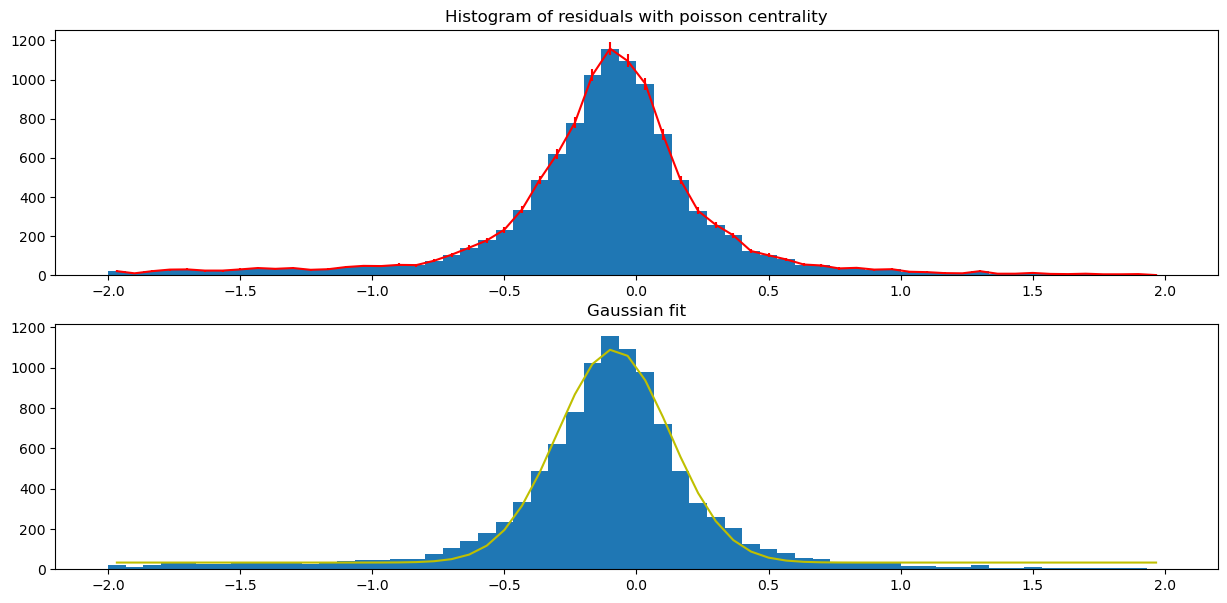

p value founded:  2.4846987147591077e-108
The p value is too small, so the fit is not satisfactory


In [76]:
import pickle
from scipy.optimize import curve_fit
from scipy import stats


def gaussian(x, a, x0, sigma, d):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

with open('data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data.item(0))
res = df['residuals'].to_numpy()

fig,(h1,h2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))
h,bins,_ = h1.hist(df['residuals'], bins = 60, range = (-2,2))
bin_centres = (bins[:-1] + bins[1:])/2.

sig_y = np.sqrt(np.abs(h))
h1.errorbar(x = bin_centres, y = h, yerr=sig_y, color="red")
h1.set_title("Histogram of residuals with poisson centrality")


parameters, covariance = curve_fit(gaussian, bin_centres, h)

gaussian_fit = gaussian(bin_centres, *parameters)

h2.plot(bin_centres, gaussian(bin_centres, *parameters), 'y-', label='gaussian fit')
h2.hist(df['residuals'], bins = 60, range = (-2,2))
h2.set_title("Gaussian fit")
plt.show()
statistic,p = stats.chisquare(h, gaussian_fit)
print("p value founded: ",p)
print("The p value is too small, so the fit is not satisfactory")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [77]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

--2023-01-20 19:03:55--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 19:03:56--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc16a4ac3dcc3e03bbbf9fb1cf18.dl.dropboxusercontent.com/cd/0/inline/B07hO6i-8JP8fG3nucSslvczWU_GjgR0ua-eRVBcHhRZQiEudphD6x3NqZDkYdkQXFn_nf-H7ErLDgzX-F2GQKrDBGTVpQOocDndm6exX6H8AiB-NBMad2hBpa_y4ly6d0RrADraMI5AkdkxxHmYmQing83ZQWeqJ278jWhQf_KB_A/file# [following]
--2023-01-20 19:03:56--  https://uc16a4ac3dcc3e03bbbf9fb1cf18.dl.dropboxusercontent.com/cd/0/inline/B07hO6i

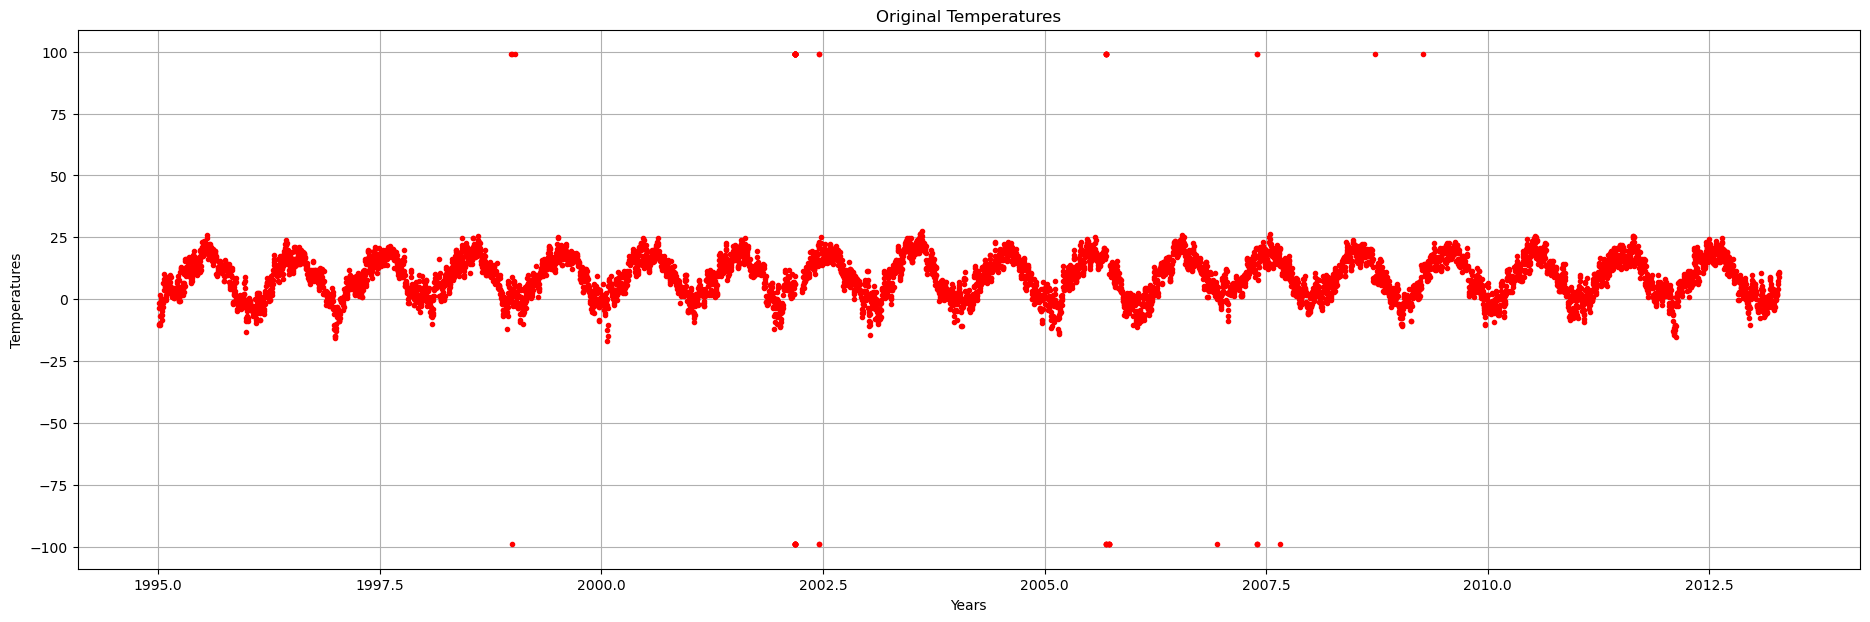

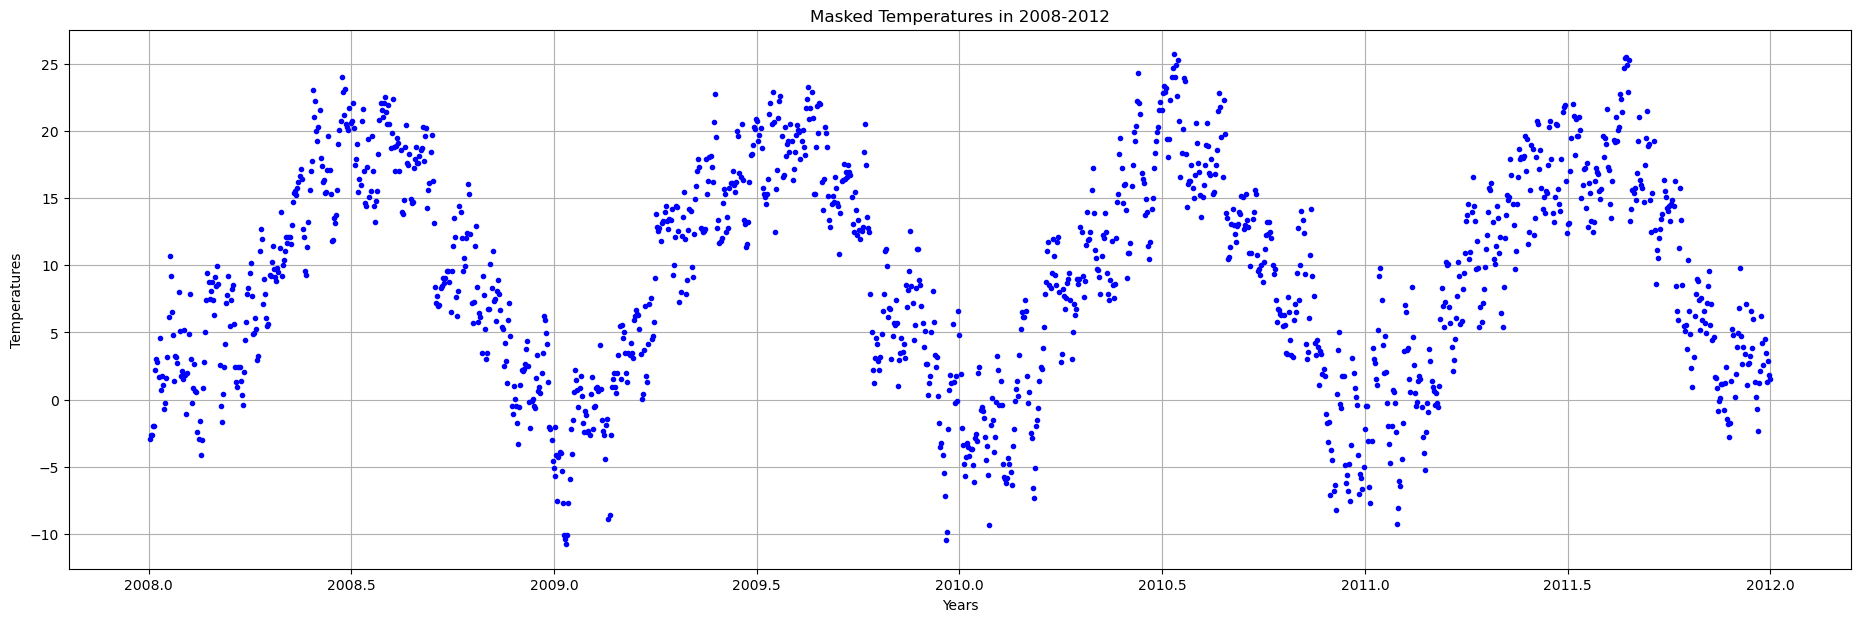


Best fit values of f(t) function; a= -9.962034674263224 , b= 12.33174286164357 , c= 9.262821312334113 

According to data; the overall average temperature in Munich is:  9.261252084167236
According to the model; the overall average temperature in Munich is:  9.262821312334113
Daily average values predicted by the model is; coldest time avg= -0.699213361929111 , hottest time avg= 19.224855986597277


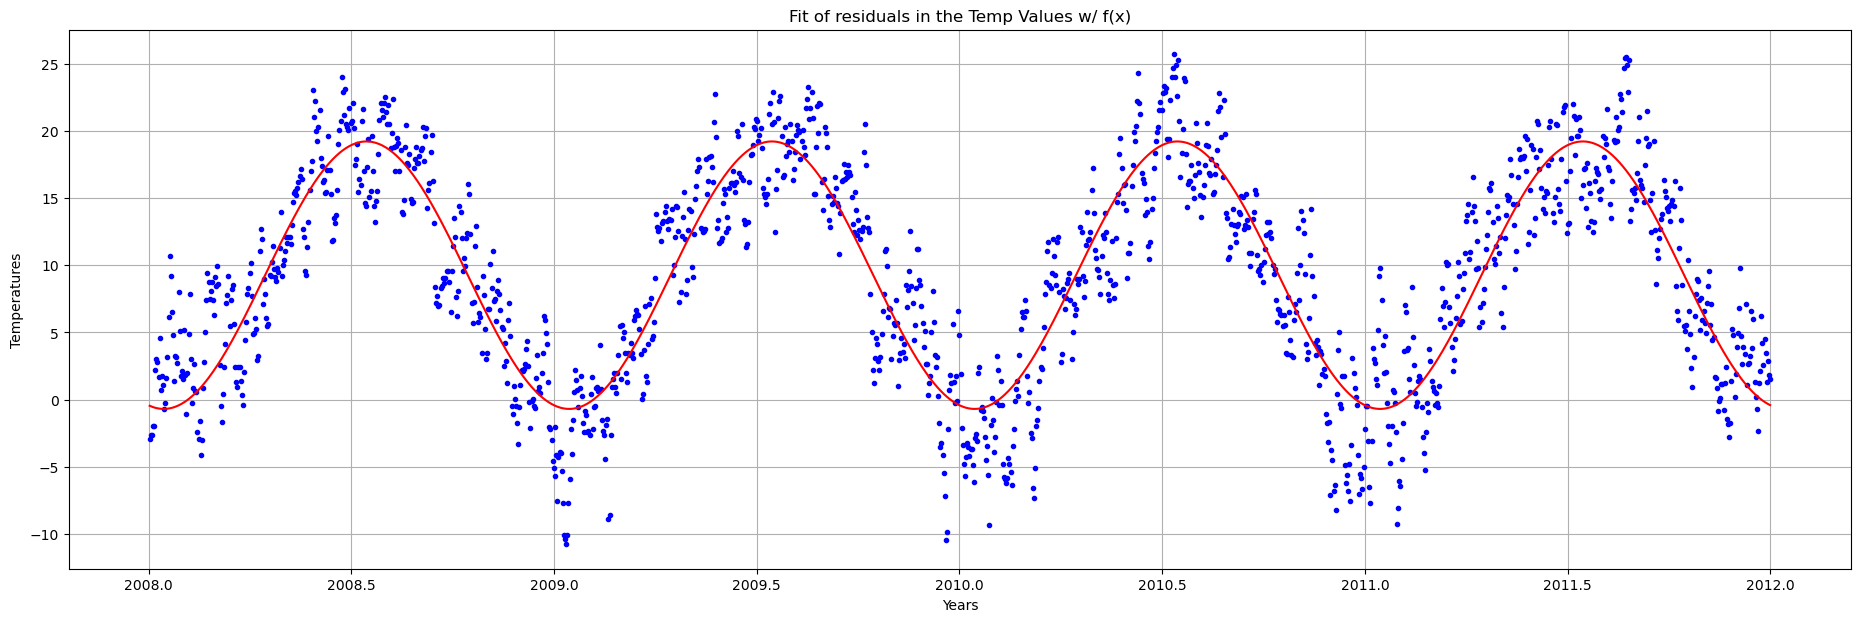


Best fit values of g(x) function; a= -9.960738603429595 , b= 1.0002934784207551 , c= 8.625237699423096

In the cosine function g(x); b represents frequency, c represents phase shift and d represents the vertical shift. 



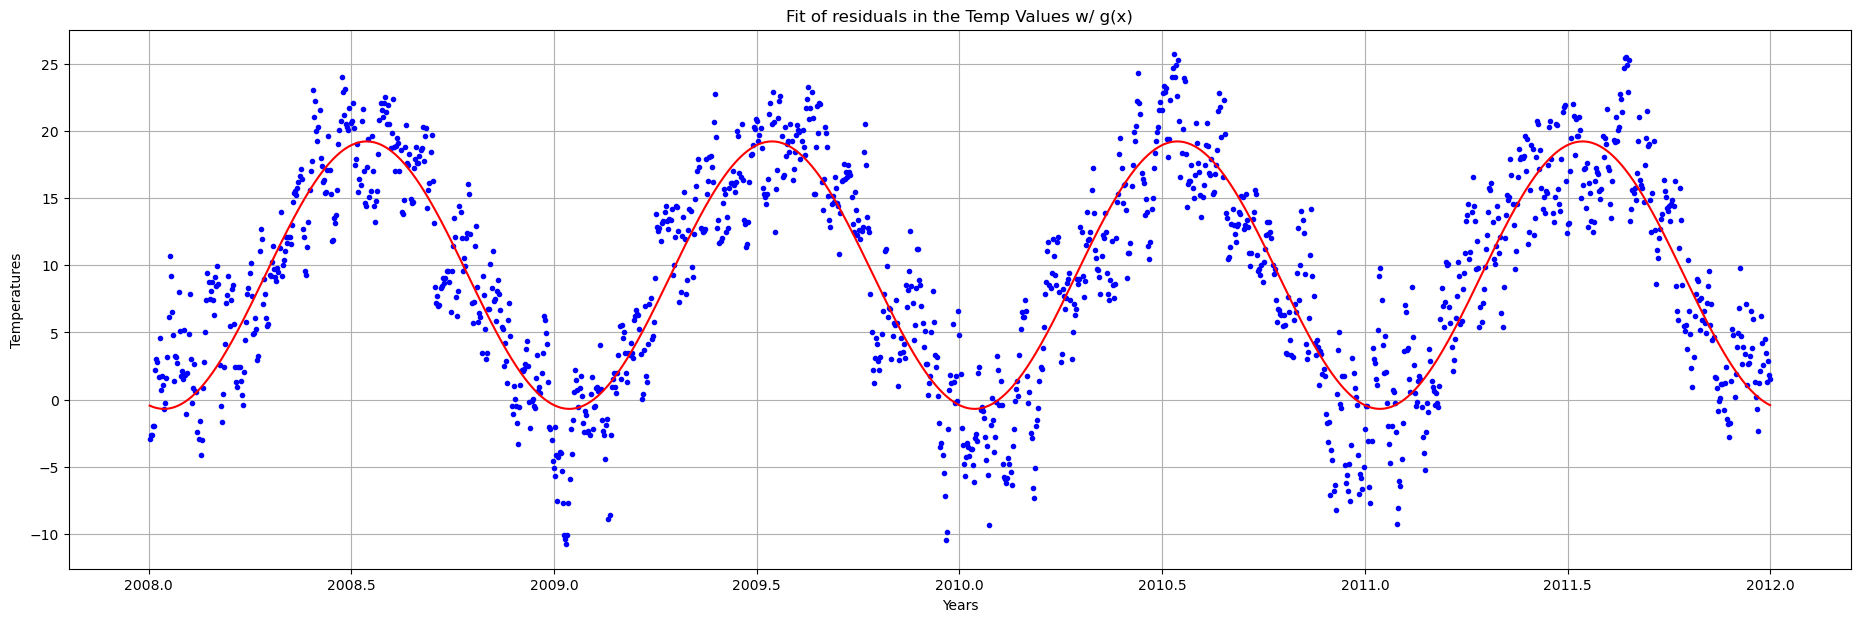


The RSS value of f(x) is: 18669.515394578368
The RSS value of g(x) is: 18669.225430564933
p-value: 0.881 , additional parameter necessary: NO


In [78]:
df1=pd.read_csv("data/munich_temperatures_average_with_bad_data.txt", delimiter=' ')
df1.columns = ["years", "temperatures"]
time=df1["years"]
temp=df1["temperatures"]

plt.figure(figsize=(23,7))
plt.plot(time, temp, 'r.')
plt.title("Original Temperatures")
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.grid()
plt.show()

def f(time, a, b, c):
  return a*np.cos(2*np.pi*time + b) + c

def f_min(time, a, b, c): # defined to find the avg max value
  return -(a*np.cos(2*np.pi*time + b) + c)

def g(time, a, b, c, d):
  return a*np.cos(2*np.pi*time*b + c) + d

mask_t=df1[(temp > -50) & (temp < 50)] # masked the abnormal temp values 
mask_yt=mask_t[(mask_t["years"] > 2008) & (mask_t["years"] < 2012)]
mask_yt # masked abnormal temp values between 2008-2012
masked_t=mask_yt["temperatures"]
masked_y=mask_yt["years"]

plt.figure(figsize=(23,7))
plt.plot(masked_y, masked_t, 'b.')
plt.title("Masked Temperatures in 2008-2012")
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.grid()
plt.show()

opt, cov = optimize.curve_fit(f, masked_y, masked_t)
opt_min = optimize.minimize_scalar(f, args =(opt[0], opt[1], opt[2]))
opt_max = optimize.minimize_scalar(f_min, args =(opt[0], opt[1], opt[2]))


print("\nBest fit values of f(t) function; a=", opt[0], ", b=", opt[1], ", c=", opt[2], "\n")
print("According to data; the overall average temperature in Munich is: ", masked_t.mean())
print("According to the model; the overall average temperature in Munich is: ", opt[2].mean())
print("Daily average values predicted by the model is; coldest time avg=", opt_min['fun'], ", hottest time avg=", -opt_max['fun'])


plt.figure(figsize=(23,7))
plt.plot(masked_y, masked_t, 'b.')
plt.plot(masked_y, f(masked_y, *opt), 'r-')
plt.title("Fit of residuals in the Temp Values w/ f(x)")
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.grid()
plt.show()

opt_g, cov_g = optimize.curve_fit(g, masked_y, masked_t)
print("\nBest fit values of g(x) function; a=", opt_g[0], ", b=", opt_g[1], ", c=", opt_g[2])
print("\nIn the cosine function g(x); b represents frequency, c represents phase shift and d represents the vertical shift. \n")

plt.figure(figsize=(23,7))
plt.plot(masked_y, masked_t, 'b.')
plt.plot(masked_y, g(masked_y, *opt_g), 'r-')
plt.title("Fit of residuals in the Temp Values w/ g(x)")
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.grid()
plt.show()

rss_fx= np.sum((masked_t - f(masked_y, *opt))**2)
rss_gx= np.sum((masked_t - g(masked_y, *opt_g))**2)
print("\nThe RSS value of f(x) is:", rss_fx)
print("The RSS value of g(x) is:", rss_gx)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

alpha = 5/100
ndof_f=4-1 # n of parameters of f(x) - 1
ndof_g=5-1 # n of parameters of g(x) - 1
result=Ftest(rss_fx, rss_gx, ndof_f, ndof_g, len(masked_y), True)
#print("The result of F-test is:", result)